In [7]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

start_date = '2023-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')


In [10]:
ticker = '^GSPC'
data = yf.download(ticker, start=start_date, end=end_date)

data.reset_index(inplace=True)
index_returns = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
index_returns = index_returns.dropna()

if len(index_returns) > 410:
    index_returns = index_returns.iloc[:410]
index_returns

[*********************100%***********************]  1 of 1 completed


1      0.007511
2     -0.011714
3      0.022584
4     -0.000768
5      0.006954
         ...   
406    0.016004
407    0.001988
408    0.009675
409   -0.001987
410    0.004231
Name: Adj Close, Length: 410, dtype: float64

In [11]:
STOCKS = []
def get_stock_data(tickers):
    for ticker in tickers:
        data = yf.download(ticker, start=start_date, end=end_date)
        data.reset_index(inplace=True)
        STOCKS.append(data)

tickers = ['1810.HK', '2015.HK', '9888.HK', '0700.HK', '601127.SS', '002594.SZ', '002432.SZ', 'AAPL', 'NVDA', 'PDD', 'TSLA']
get_stock_data(tickers)

stocks_returns = []
for stock in STOCKS:
    returns = np.log(stock['Adj Close'] / stock['Adj Close'].shift(1))
    returns = returns.dropna()

    if len(returns) > 410:
        returns = returns.iloc[:410]
    stocks_returns.append(returns)

n = len(tickers)
weights = np.full(n, 1/n)
df = pd.DataFrame({
    f'stock_{chr(65 + i)}': stocks_returns[i] for i in range(n)
})
stock_returns = df.dot(weights)

print(stock_returns)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1      0.022649
2      0.009458
3      0.004046
4      0.021386
5      0.011361
         ...   
406    0.027783
407    0.002451
408    0.003668
409   -0.012675
410   -0.000403
Length: 410, dtype: float64


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     69.72
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           1.08e-15
Time:                        10:28:01   Log-Likelihood:                 1266.9
No. Observations:                 410   AIC:                            -2530.
Df Residuals:                     408   BIC:                            -2522.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.917      0.3

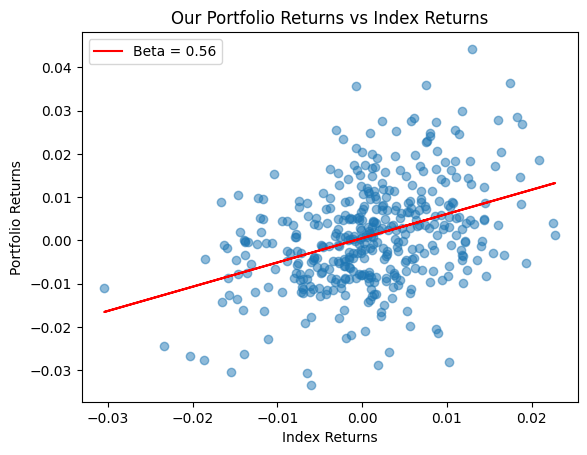

In [13]:
X = index_returns
y = stock_returns

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

beta = model.params['Adj Close']
alpha = model.params['const']

print(f"Beta: {beta}")
print(f"Alpha: {alpha}")

plt.scatter(index_returns, stock_returns, alpha=0.5)
plt.plot(index_returns, model.predict(X), color='red', label=f'Beta = {beta:.2f}')
plt.title('Our Portfolio Returns vs Index Returns')
plt.xlabel('Index Returns')
plt.ylabel('Portfolio Returns')
plt.legend()
plt.show()